In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[:, :2]#为了可视化，这里只取iris里的前2个维度作为特征进行fit
y = y[:] #分类3中鸢尾花，不再是二分类问题，而是多分类问题了

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [14]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [15]:
log_reg.score(X_test, y_test)

0.7894736842105263

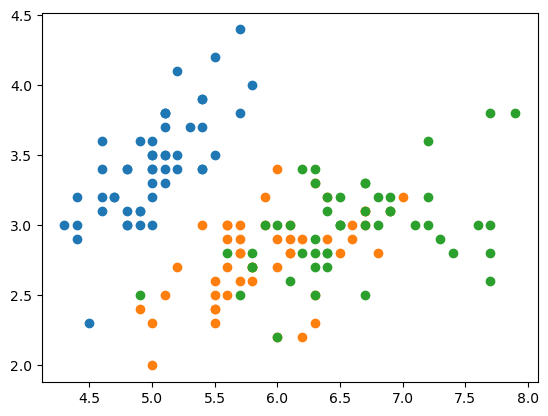

In [16]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [17]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1), 
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

Text(0.5, 1.0, "ovo-multiclass='multinomial'-solver='newton-cg'")

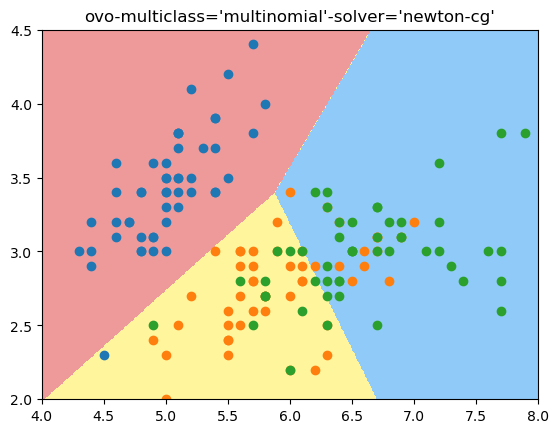

In [38]:
plot_decision_boundary(log_reg, [4, 8, 2, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.title("ovo-multiclass='multinomial'-solver='newton-cg'")

In [36]:
#log_reg1 = LogisticRegression(multi_class='multinomial', solver='newton-cg') # 这个方式就是ovo的方式 - default
log_reg1 = LogisticRegression(multi_class='ovr', solver='liblinear') # 这个方式是ovr的方式
log_reg1.fit(X_train, y_train)
log_reg1.score(X_test, y_test)

0.6578947368421053

Text(0.5, 1.0, "ovr-multiclass='ovr'-solver='liblinear'")

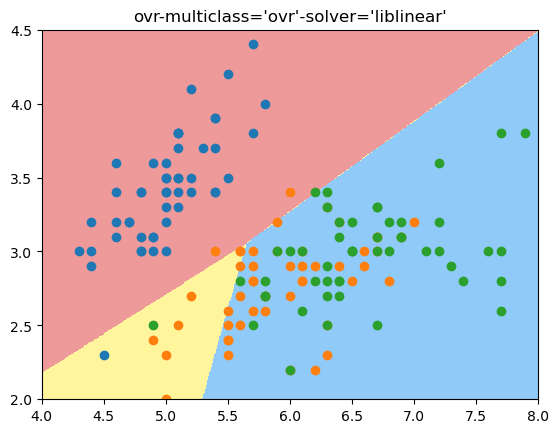

In [39]:
plot_decision_boundary(log_reg1, [4, 8, 2, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.title("ovr-multiclass='ovr'-solver='liblinear'")

## OvO and Ovr

In [42]:
from sklearn.multiclass import OneVsRestClassifier

In [50]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
log_reg1 = LogisticRegression(multi_class='ovr', solver='liblinear')
ovr = OneVsRestClassifier(log_reg1)

In [51]:
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9473684210526315

In [47]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(log_reg)

In [48]:
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0

In [49]:
log_reg1 = LogisticRegression(multi_class='ovr', solver='liblinear') # 这个方式是ovr的方式
log_reg1.fit(X_train, y_train)
log_reg1.score(X_test, y_test)

0.9473684210526315